In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd
import glob
from scipy.ndimage import gaussian_filter

import galaxy_tools as gal
import general_tools as gen

pd.set_option('display.max_columns', None)
%matplotlib inline

palettable colormaps are not installed
don't have phil's colormaps


# Fitting: Smoothing Length vs Binning

To understand the different effects of the smoothing length and binning on the Sersic fit

The number of bins choose are: 100, 200, 300

And the smoothing lengths choosen are: 


In [2]:
# Grab the file names for the band image and mock images
mock_image = glob.glob('mock_image_files/*')

ugr = []
mock = []

for i in range(len(mock_image)):
    if mock_image[i][29:32] == 'ugr':
        ugr = np.append(ugr, mock_image[i])
    
    elif mock_image[i][30:33] == 'ugr':
        ugr = np.append(ugr, mock_image[i])
        
    elif mock_image[i][-3:] == 'npy':
        mock = np.append(mock, mock_image[i])

ugr = np.sort(ugr)
mock = np.sort(mock)

In [4]:
mock

array(['mock_image_files/m10b_res500_mockimage_xy_FOV3_p1000.npy',
       'mock_image_files/m10b_res500_mockimage_yz_FOV3_p1000.npy',
       'mock_image_files/m10b_res500_mockimage_zx_FOV3_p1000.npy',
       'mock_image_files/m10c_res500_mockimage_xy_FOV3_p1000.npy',
       'mock_image_files/m10c_res500_mockimage_yz_FOV3_p1000.npy',
       'mock_image_files/m10c_res500_mockimage_zx_FOV3_p1000.npy',
       'mock_image_files/m10d_res500_mockimage_xy_FOV3_p1000.npy',
       'mock_image_files/m10d_res500_mockimage_yz_FOV3_p1000.npy',
       'mock_image_files/m10d_res500_mockimage_zx_FOV3_p1000.npy',
       'mock_image_files/m10e_res500_mockimage_xy_FOV4_p1000.npy',
       'mock_image_files/m10e_res500_mockimage_yz_FOV4_p1000.npy',
       'mock_image_files/m10e_res500_mockimage_zx_FOV4_p1000.npy',
       'mock_image_files/m10f_res500_mockimage_xy_FOV5_p1000.npy',
       'mock_image_files/m10f_res500_mockimage_yz_FOV5_p1000.npy',
       'mock_image_files/m10f_res500_mockimage_zx_FOV5_p1000.n

In [3]:
#im_number = 
band = 1 #g-band
band_image = np.load(ugr[im_number])[band]
mock_image = np.load(mock[im_number])
print(ugr[im_number])
print(mock[im_number])

NameError: name 'im_number' is not defined

mock_image_files/m10b_res500_mockimage_xy_FOV3_p1000.npy


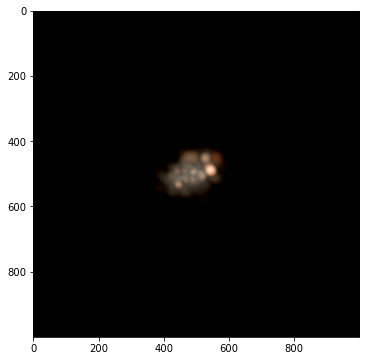

mock_image_files/m10b_res500_mockimage_yz_FOV3_p1000.npy


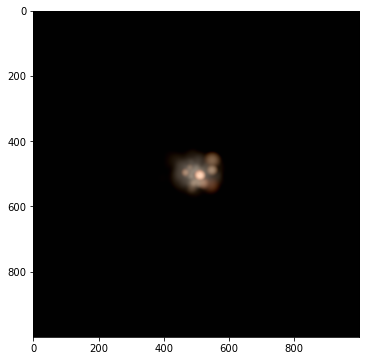

mock_image_files/m10b_res500_mockimage_zx_FOV3_p1000.npy


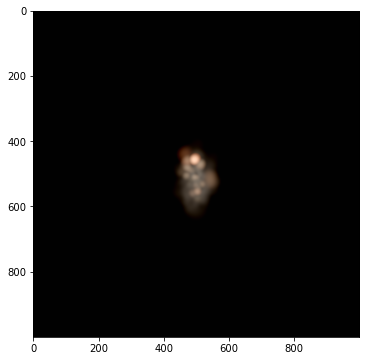

mock_image_files/m10c_res500_mockimage_xy_FOV3_p1000.npy


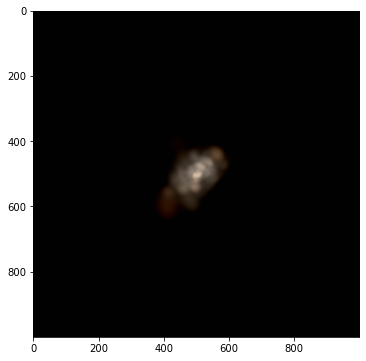

mock_image_files/m10c_res500_mockimage_yz_FOV3_p1000.npy


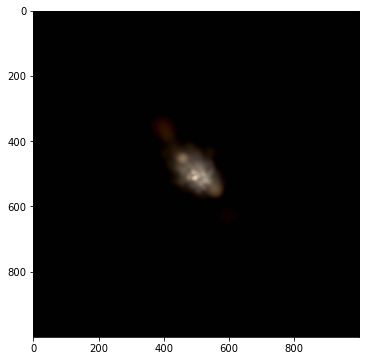

mock_image_files/m10c_res500_mockimage_zx_FOV3_p1000.npy


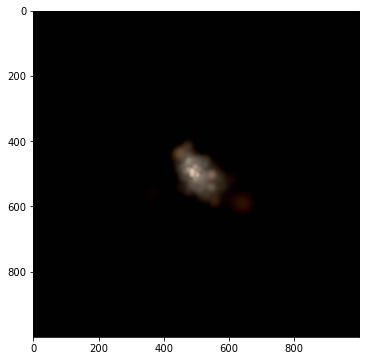

mock_image_files/m10d_res500_mockimage_xy_FOV3_p1000.npy


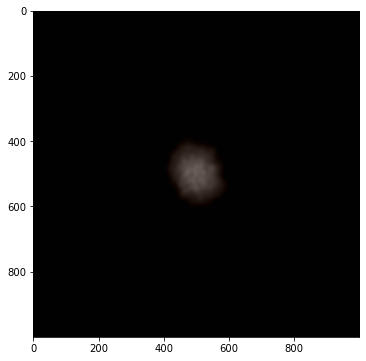

mock_image_files/m10d_res500_mockimage_yz_FOV3_p1000.npy


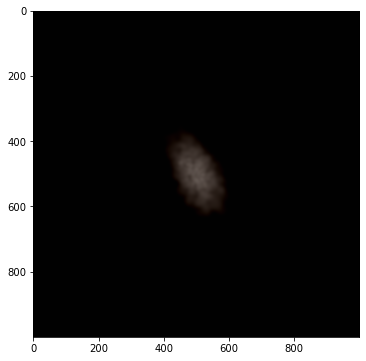

mock_image_files/m10d_res500_mockimage_zx_FOV3_p1000.npy


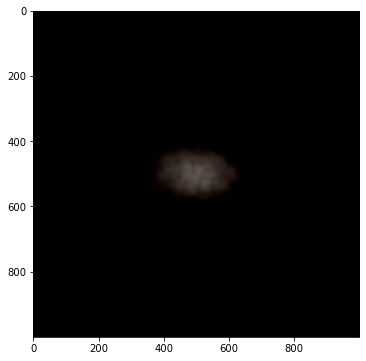

mock_image_files/m10e_res500_mockimage_xy_FOV4_p1000.npy


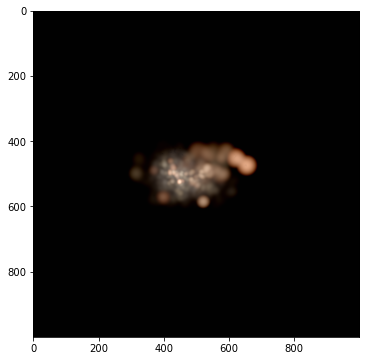

mock_image_files/m10e_res500_mockimage_yz_FOV4_p1000.npy


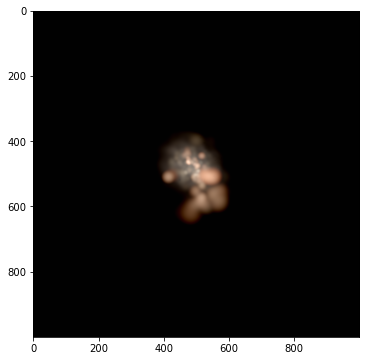

mock_image_files/m10e_res500_mockimage_zx_FOV4_p1000.npy


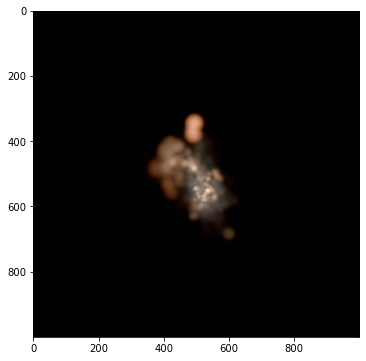

mock_image_files/m10f_res500_mockimage_xy_FOV5_p1000.npy


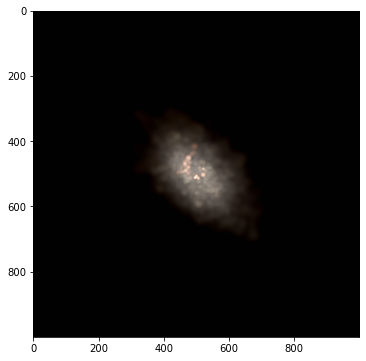

mock_image_files/m10f_res500_mockimage_yz_FOV5_p1000.npy


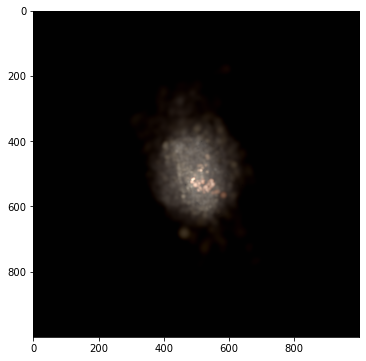

mock_image_files/m10f_res500_mockimage_zx_FOV5_p1000.npy


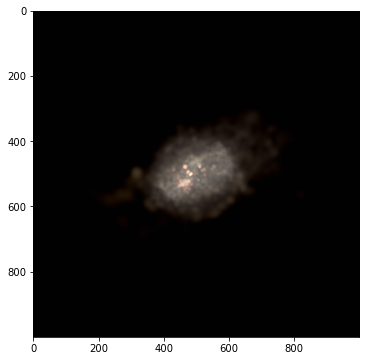

mock_image_files/m10g_res500_mockimage_xy_FOV4_p1000.npy


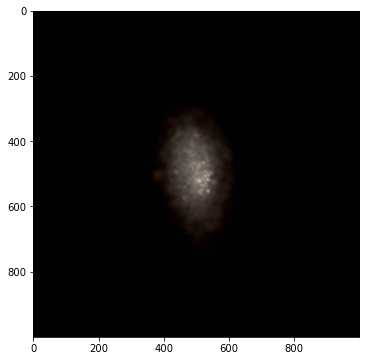

mock_image_files/m10g_res500_mockimage_yz_FOV4_p1000.npy


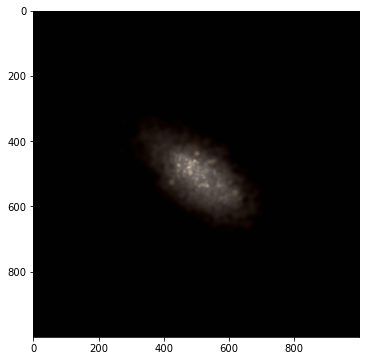

mock_image_files/m10g_res500_mockimage_zx_FOV4_p1000.npy


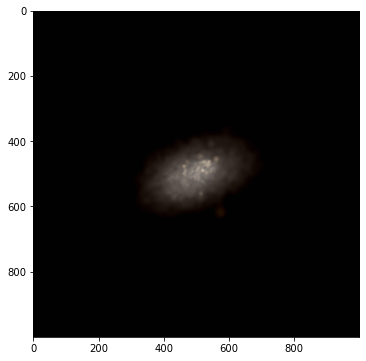

mock_image_files/m10h_res500_mockimage_xy_FOV4_p1000.npy


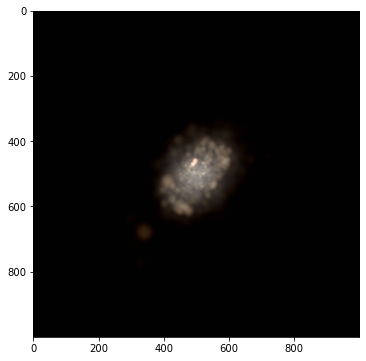

mock_image_files/m10h_res500_mockimage_yz_FOV4_p1000.npy


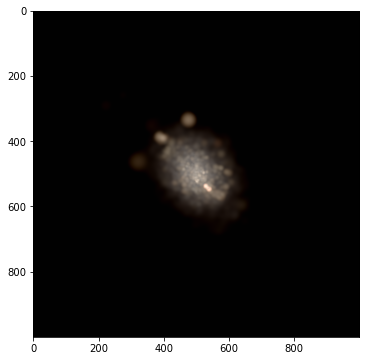

mock_image_files/m10h_res500_mockimage_zx_FOV4_p1000.npy


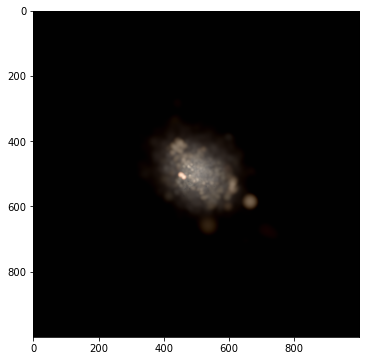

mock_image_files/m10i_res500_mockimage_xy_FOV3_p1000.npy


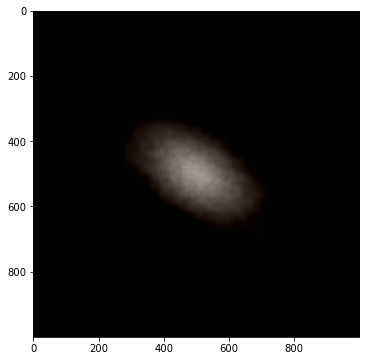

mock_image_files/m10i_res500_mockimage_yz_FOV3_p1000.npy


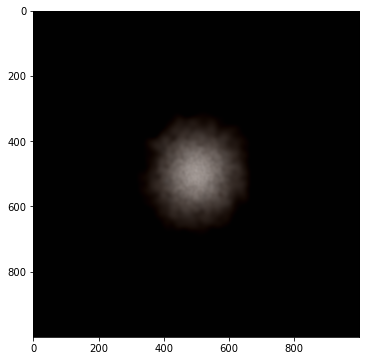

mock_image_files/m10i_res500_mockimage_zx_FOV3_p1000.npy


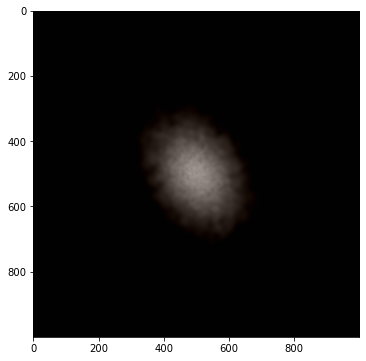

mock_image_files/m10j_res500_mockimage_xy_FOV4_p1000.npy


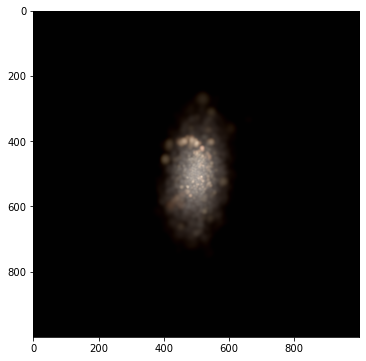

mock_image_files/m10j_res500_mockimage_yz_FOV4_p1000.npy


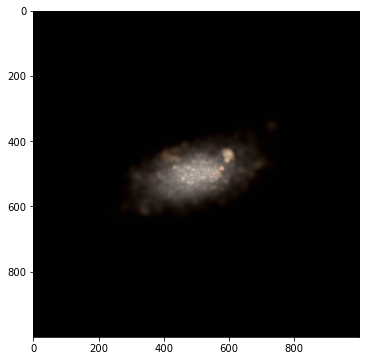

mock_image_files/m10j_res500_mockimage_zx_FOV4_p1000.npy


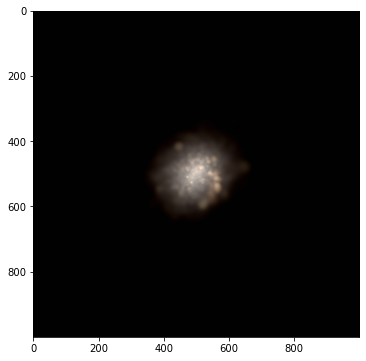

mock_image_files/m10k_res500_mockimage_xy_FOV4_p1000.npy


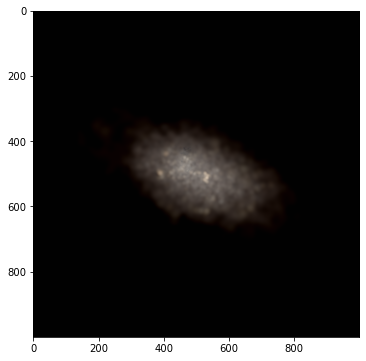

mock_image_files/m10k_res500_mockimage_yz_FOV4_p1000.npy


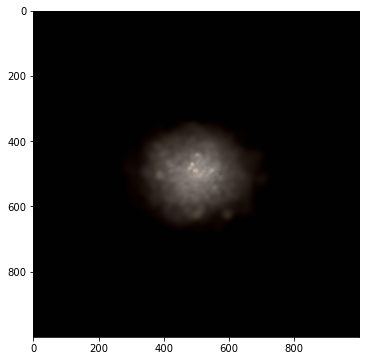

mock_image_files/m10k_res500_mockimage_zx_FOV4_p1000.npy


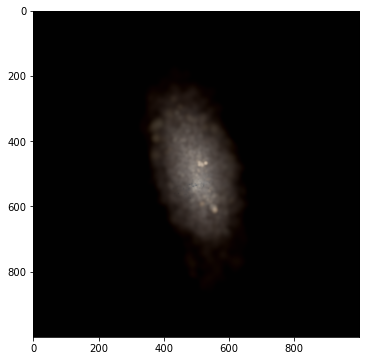

mock_image_files/m10l_res500_mockimage_xy_FOV4_p1000.npy


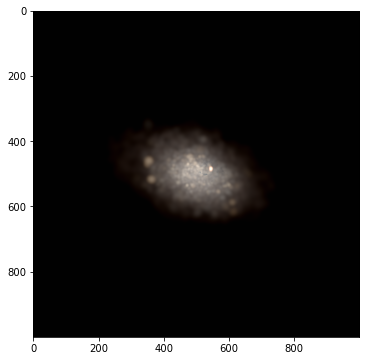

mock_image_files/m10l_res500_mockimage_yz_FOV4_p1000.npy


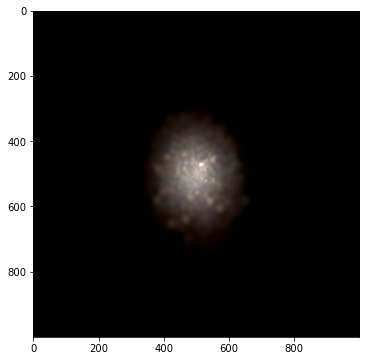

mock_image_files/m10l_res500_mockimage_zx_FOV4_p1000.npy


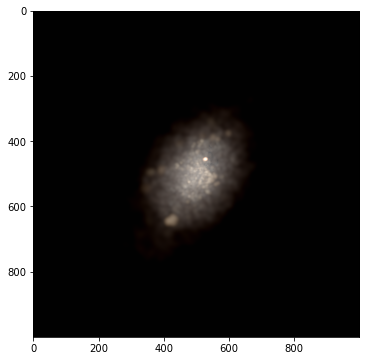

mock_image_files/m10m_res500_mockimage_xy_FOV4_p1000.npy


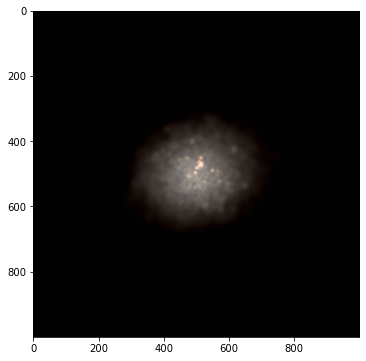

mock_image_files/m10m_res500_mockimage_yz_FOV4_p1000.npy


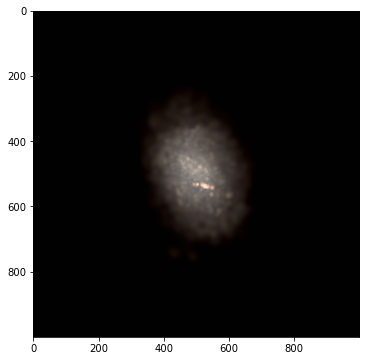

mock_image_files/m10m_res500_mockimage_zx_FOV4_p1000.npy


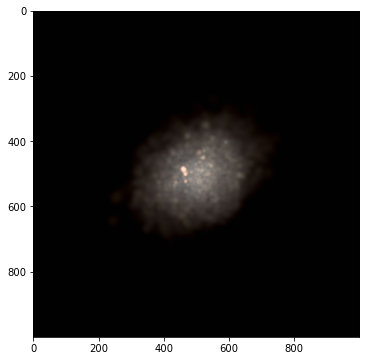

mock_image_files/m11a_res2100_mockimage_xy_FOV15_p1000.npy


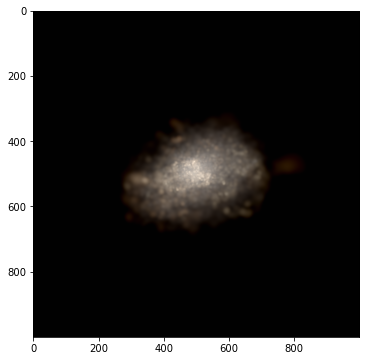

mock_image_files/m11a_res2100_mockimage_yz_FOV15_p1000.npy


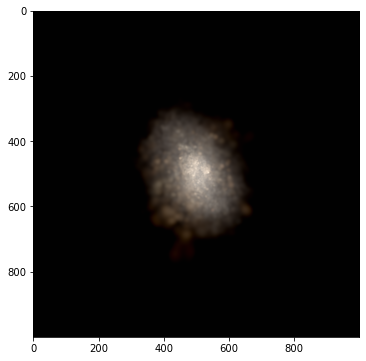

mock_image_files/m11a_res2100_mockimage_zx_FOV15_p1000.npy


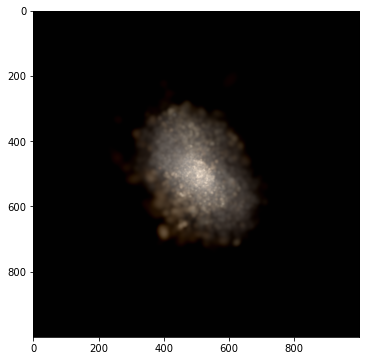

mock_image_files/m11b_res2100_mockimage_xy_FOV18_p1000.npy


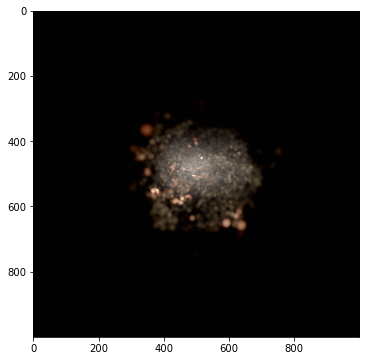

mock_image_files/m11b_res2100_mockimage_yz_FOV18_p1000.npy


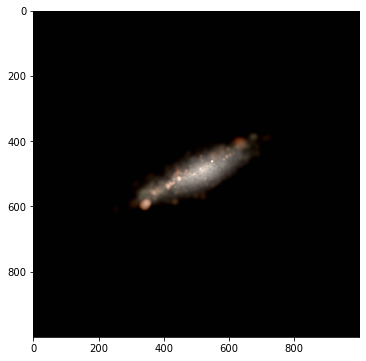

mock_image_files/m11b_res2100_mockimage_zx_FOV18_p1000.npy


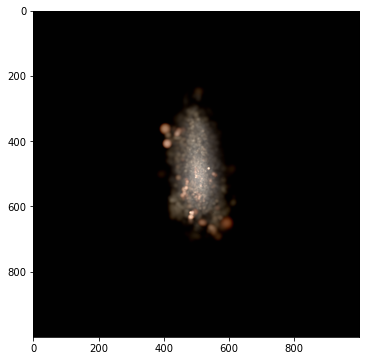

mock_image_files/m11c_res2100_mockimage_xy_FOV20_p1000.npy


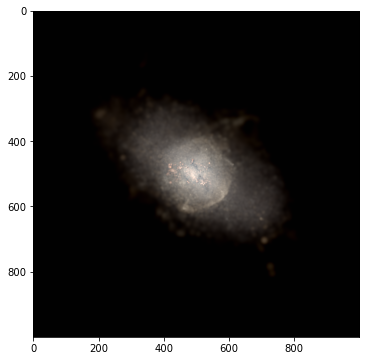

mock_image_files/m11c_res2100_mockimage_yz_FOV20_p1000.npy


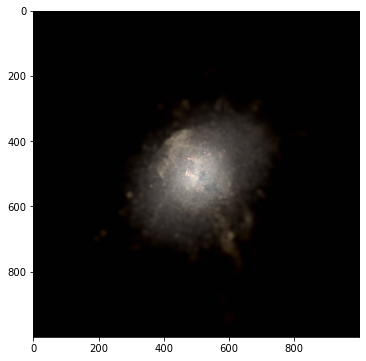

mock_image_files/m11c_res2100_mockimage_zx_FOV20_p1000.npy


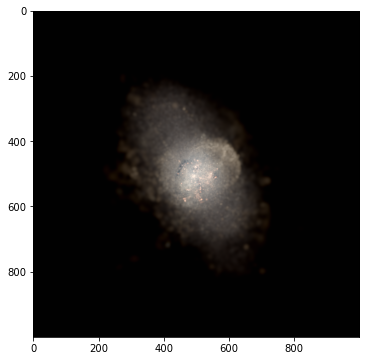

mock_image_files/m11e_res7100_mockimage_xy_FOV30_p1000.npy


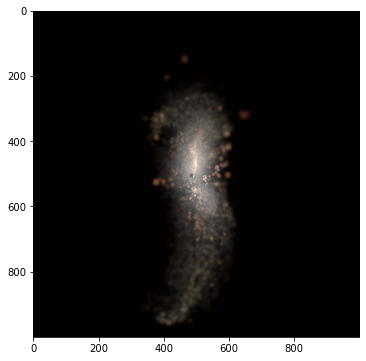

mock_image_files/m11e_res7100_mockimage_yz_FOV30_p1000.npy


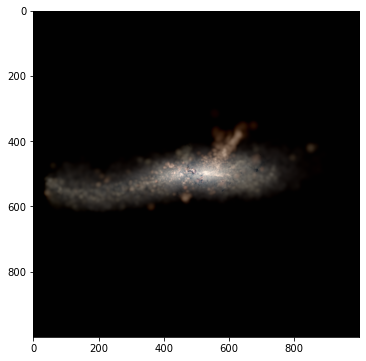

mock_image_files/m11e_res7100_mockimage_zx_FOV30_p1000.npy


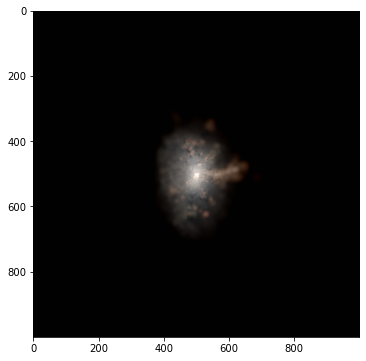

mock_image_files/m11h_res7100_mockimage_xy_FOV30_p1000.npy


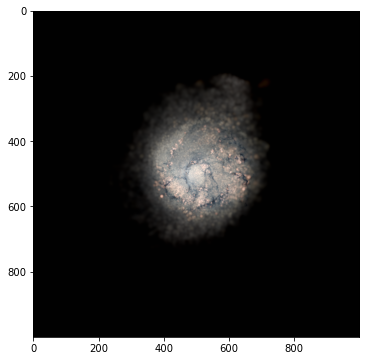

mock_image_files/m11h_res7100_mockimage_yz_FOV30_p1000.npy


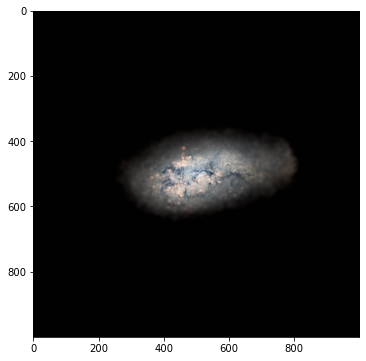

mock_image_files/m11h_res7100_mockimage_zx_FOV30_p1000.npy


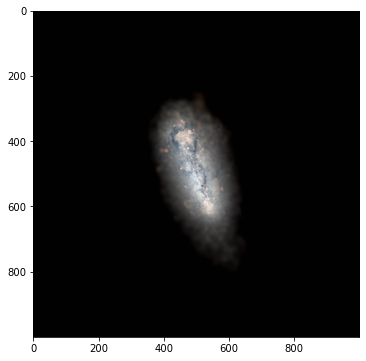

mock_image_files/m11i_res7100_mockimage_xy_FOV30_p1000.npy


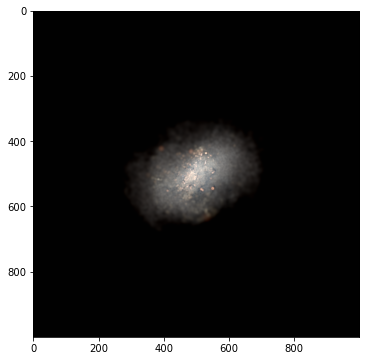

mock_image_files/m11i_res7100_mockimage_yz_FOV30_p1000.npy


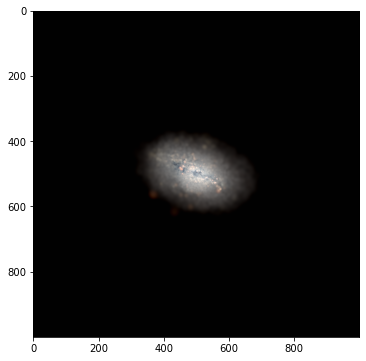

mock_image_files/m11i_res7100_mockimage_zx_FOV30_p1000.npy


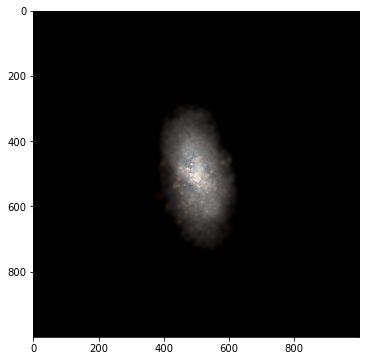

mock_image_files/m11q_res7100_mockimage_xy_FOV20_p1000.npy


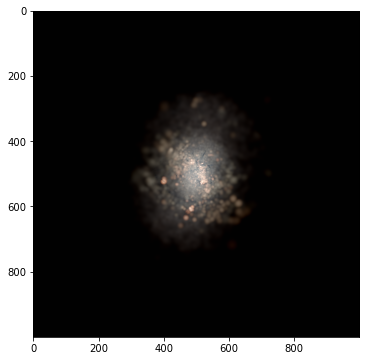

mock_image_files/m11q_res7100_mockimage_yz_FOV20_p1000.npy


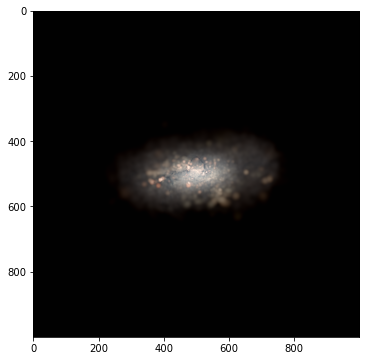

mock_image_files/m11q_res7100_mockimage_zx_FOV20_p1000.npy


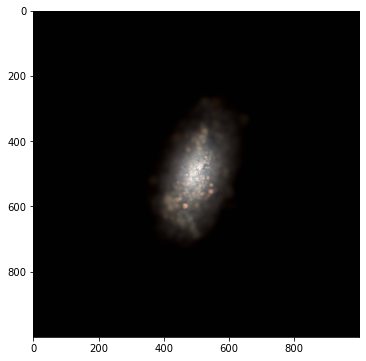

mock_image_files/m11v_res7100_mockimage_xy_FOV25_p1000.npy


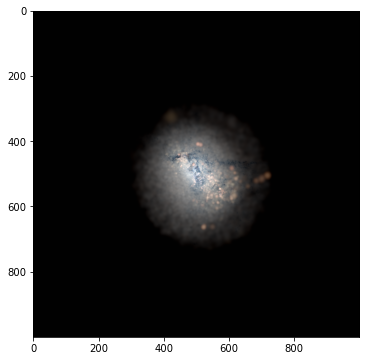

mock_image_files/m11v_res7100_mockimage_yz_FOV25_p1000.npy


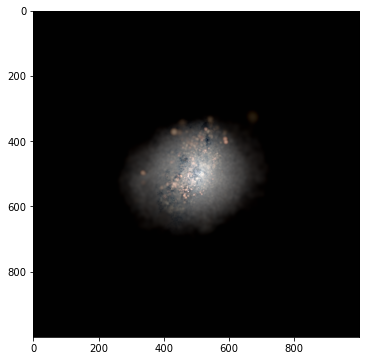

mock_image_files/m11v_res7100_mockimage_zx_FOV25_p1000.npy


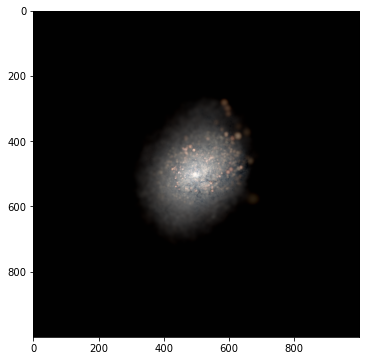

In [6]:
for file in mock:
    print(file)
    mock_image = np.load(file)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(mock_image)
    plt.show()

In [38]:
band = 1 #g-band

band_image = np.load('mock_image_files/m11c_res2100_ugrband_xy_FOV20_p1000.npy')[band]
mock_image = np.load('mock_image_files/m11c_res2100_mockimage_xy_FOV20_p1000.npy')

In [43]:
# The FOV used is indicated in the file name
FOV = 20

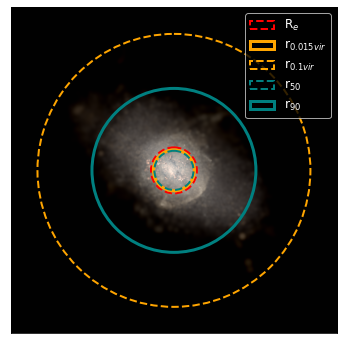

In [87]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(mock_image)

halo_lim = plt.Circle((500, 500), 2.817404 * 500 / 20  , 
                      color='red', fill=False, linestyle='--' ,linewidth=2,label='R$_{e}$') #reff2D
ax.add_patch(halo_lim)


#halo_lim = plt.Circle((500, 500), 501.001147, color='blue', fill=False)#rvir
#ax.add_patch(halo_lim)


halo_lim = plt.Circle((500, 500), 2.510726* 500 / 20 , 
                      color='orange', fill=False,linewidth=3, label='r$_{0.015vir}$', linestyle='-')#0.015rvir
ax.add_patch(halo_lim)

halo_lim = plt.Circle((500, 500), 16.738176* 500 / 20 , 
                      color='orange', fill=False,linewidth=2, label='r$_{0.1vir}$', linestyle='--')#0.1rvir
ax.add_patch(halo_lim)

halo_lim = plt.Circle((500, 500), 2.403146* 500 / 20 , 
                      color='teal', fill=False, linestyle='--' ,linewidth=2, label='r$_{50}$') #r50
ax.add_patch(halo_lim)

halo_lim = plt.Circle((500, 500), 10.052898* 500 / 20 , 
                      color='teal', fill=False, linestyle='-' ,linewidth=3, label='r$_{90}$')#r90
ax.add_patch(halo_lim)





ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
mpl.rcParams['font.size'] = 12

ax.legend(facecolor='black', labelcolor='white')

#plt.savefig('plots/m11c_mockimage_wcircles.pdf', bbox_inches='tight')
plt.show()


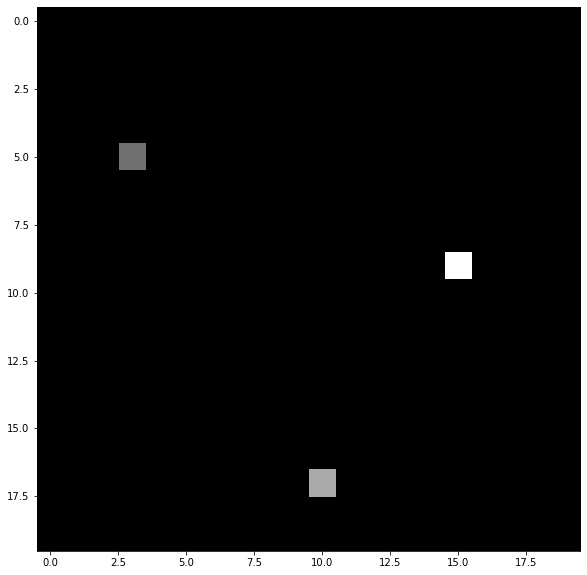

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
mock_image = band_image[0:20,0:20]
mock_image[5,3] = .4
mock_image[9,15] = .9
mock_image[17,10] = .6


ax.imshow(mock_image,cmap='gray')

mock_image_smoothed = gaussian_filter(mock_image, sigma = 2)

#ax.imshow(mock_image_smoothed,cmap='gray')
#ax[1,1].imshow(np.log10(band_image_smoothed+1))


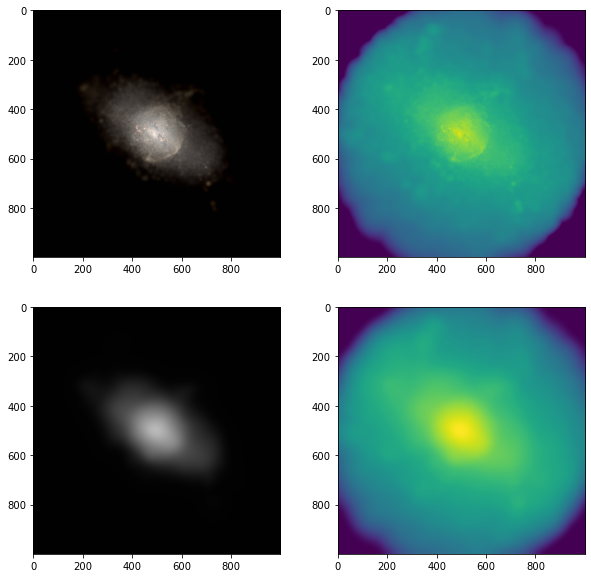

In [19]:
fig, ax = plt.subplots(2,2,figsize=(10, 10))

ax[0,0].imshow(mock_image)
ax[0,1].imshow(np.log10(band_image+1))

band_image_smoothed = gaussian_filter(band_image, sigma = 20)
mock_image_smoothed = gaussian_filter(mock_image, sigma = 20)

ax[1,0].imshow(mock_image_smoothed)
ax[1,1].imshow(np.log10(band_image_smoothed+1))


R_e: 2.11, Std: 0.10
R_e: 2.06, Std: 0.08
R_e: 2.20, Std: 0.13
R_e: 2.90, Std: 0.04
R_e: 2.82, Std: 0.06
R_e: 2.94, Std: 0.09


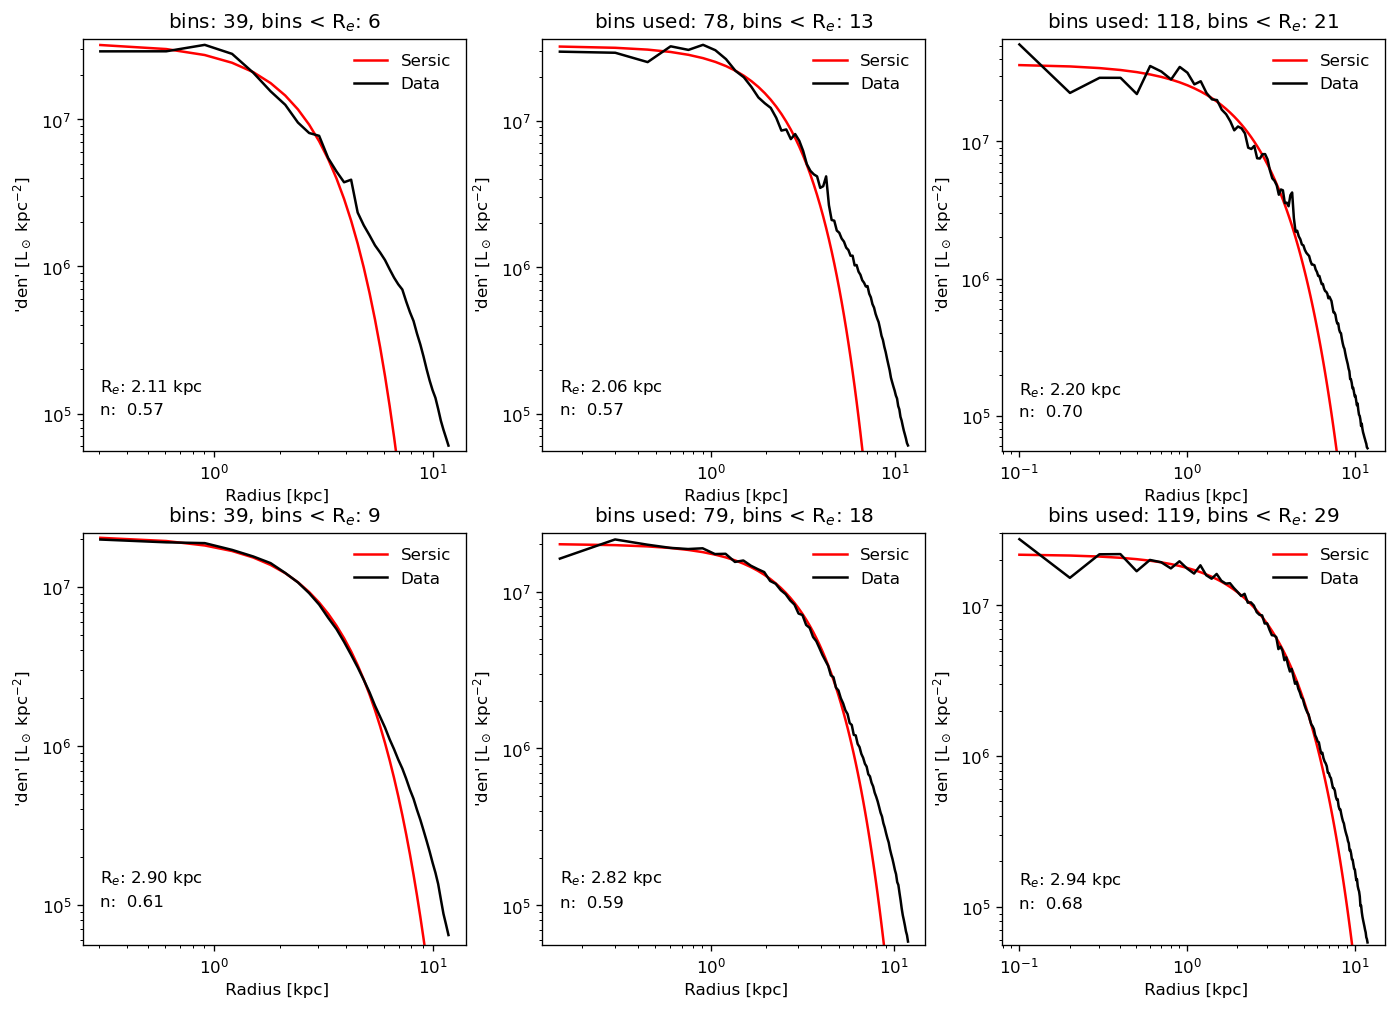

In [119]:
fig, ax = plt.subplots(2,3,figsize=(14, 10))

#Sersic fit with the Mock Images

radius,sb = gen.measure_surfbright(band_image, FOV=FOV, nmeasure=100)
R_e,I,n,std = gen.fit_sersic(radius, sb, ax_sersic=ax[0,0])
ax[0,0].set_title(f'bins: {len(radius)}, bins < R$_e$: {len(radius[radius<R_e])}')
print(f'R_e: {R_e:.2f}, Std: {std[0]:.2f}')

radius,sb = gen.measure_surfbright(band_image, FOV=FOV, nmeasure=200)
R_e,I,n,std = gen.fit_sersic(radius, sb, ax_sersic=ax[0,1])
ax[0,1].set_title(f'bins used: {len(radius)}, bins < R$_e$: {len(radius[radius<R_e])}')
print(f'R_e: {R_e:.2f}, Std: {std[0]:.2f}')

radius,sb = gen.measure_surfbright(band_image, FOV=FOV, nmeasure=300)
R_e,I,n,std = gen.fit_sersic(radius, sb, ax_sersic=ax[0,2])
ax[0,2].set_title(f'bins used: {len(radius)}, bins < R$_e$: {len(radius[radius<R_e])}')
print(f'R_e: {R_e:.2f}, Std: {std[0]:.2f}')

radius,sb = gen.measure_surfbright(band_image_smoothed, FOV=FOV, nmeasure=100)
R_e,I,n,std = gen.fit_sersic(radius, sb, ax_sersic=ax[1,0])
ax[1,0].set_title(f'bins: {len(radius)}, bins < R$_e$: {len(radius[radius<R_e])}')
print(f'R_e: {R_e:.2f}, Std: {std[0]:.2f}')

radius,sb = gen.measure_surfbright(band_image_smoothed, FOV=FOV, nmeasure=200)
R_e,I,n,std = gen.fit_sersic(radius, sb, ax_sersic=ax[1,1])
ax[1,1].set_title(f'bins used: {len(radius)}, bins < R$_e$: {len(radius[radius<R_e])}')
print(f'R_e: {R_e:.2f}, Std: {std[0]:.2f}')

radius,sb = gen.measure_surfbright(band_image_smoothed, FOV=FOV, nmeasure=300)
R_e,I,n,std = gen.fit_sersic(radius, sb, ax_sersic=ax[1,2])
ax[1,2].set_title(f'bins used: {len(radius)}, bins < R$_e$: {len(radius[radius<R_e])}')
print(f'R_e: {R_e:.2f}, Std: {std[0]:.2f}')

plt.show()

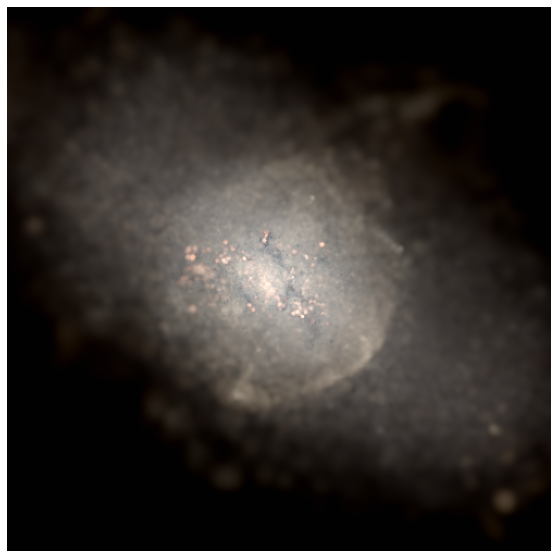

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis('off')
plt.imshow(mock_image[250:750,250:750])
plt.savefig('dwarfimage.png', bbox_inches='tight',pad_inches = 0)
